## <h1 align="center">Actividad: Agrupar datos textuales con el Modelo de Tópicos y el algoritmo Latent Dirichlet Allocation (LDA)</h3>

<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<h2> Preámbulo</h2>
<p> Esta actividad se inspira de ejercicios disponibles en los recursos siguientes:<p>
<ul>
    <li>Biblioteca <a href="http://scikit-learn.org/stable/install.html/">SciKit-learn</a> de Python</li>
    <li>Código disponible en  <a href="https://github.com/lda-project/lda/">lda-project</a></li>
</ul>
<p> La actividad requiere el uso de Python 3.x y <a href="http://jupyter.org/install">Jupyter Notebook</a>. El código entregado fue probado con Python 3.6.1. Para saber cuál versión de Python usted está utilizando, ejecutar la celda siguiente (está información es importante cuando se necesitará instalar nuevos paquetes.)
</p>
</div>


<div style="border: 2px solid #D24747; background-color:#F8B4B4">
<h2>Objetivos de la actividad</h2>
<p>El <b>objetivo general</b> de esta actividad consiste en  explorar la estructura oculta de un conjunto de datos textuales.</p>
<p> Comenzaremos por utilizar un  algoritmo de clustering tradicional como Kmeans para explorar datos textuales, considerando la medida tf-idf por cada término presente en cada texto, para caracterizar los textos y construir distancias entre ellos.</p>
<p>En una segunda fase utilizaremos el <a href="https://drive.google.com/open?id=1rSQPJvRVj0V_IChzspQMRPNwlDTkHYHp"> Modelo Probabilista De Tópicos </a> para descubrir tópicos en los textos. Para ello se utilizará el algoritmo de asignación de tópicos latentes conocido como <a href= "https://drive.google.com/open?id=1BobImO3192hifZPLXowd14gryVAUzBPW">Latent Dirichlet Allocation (LDA)</a>. El enfoque es probabilista, por lo que el resultado del algoritmo es descubrir tópicos en los textos (el número de tópicos es definido por el analista) y asignar una distribución de probabilidad de tópicos en cada texto.</p>  Dependiendo del tamaño de los textos, es también posible agruparlos de acuerdo al tópico con mayor representación en cada uno, lo que permitirá comparar esta metodología con los algoritmos de clustering clásicos.</p> </div>
    
  

<div style="border: 2px solid #D24747; background-color:#F8B4B4">
<p>Utilizaremos las 100 primeras noticias del conjunto de datos trabajado en la sesion anterior, provenientes de datos de el diario La Tercera.</p>   
<p>El primer paso es la lectura de datos: </p></div>

In [48]:
import pandas as pd

DATASET_CSV="sophia_latercera-1000.csv"

df = pd.read_csv(DATASET_CSV,sep='|',error_bad_lines=False,header=None)
df[0] = pd.to_datetime(df[0])

texts=df[[0,3]]
texts.columns = ['fecha', 'noticia']
noticias = texts.noticia[1:100]
len(noticias)


99

In [34]:
import spacy
nlp = spacy.load("es_core_news_sm")

def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = []
    doc = nlp(sentence.lower().strip())
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.is_digit and not token.like_num:
            mytokens.append(token.lemma_)
    return mytokens




In [35]:
#Utilizando Kmeans y tf-idf para realizar un primer agrupamiento de las noticias
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

myStopWords=['a','e','o','u','y']
vectorizer = TfidfVectorizer(tokenizer=spacy_tokenizer, stop_words=myStopWords, ngram_range=(1,2))

X=vectorizer.fit_transform(noticias) 
X_term = vectorizer.get_feature_names()


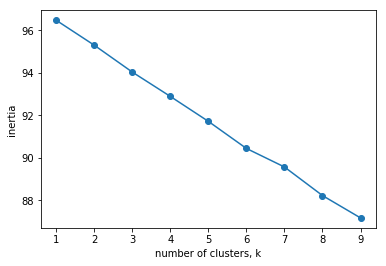

In [37]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt


num_k = range(1, 10)
inertias = []

for k in num_k:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, n_init=10)

    # Fit model to samples
    model.fit(X)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)


# Plot ks vs inertias
plt.plot(num_k, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(num_k)
plt.show()

<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<p>Pregunta Nº1: Explore las clases TfidfVectorizer, CountVectorizer. ¿Qué rol cumplen? ¿Qué tratamiento premilinar de textos se ha hecho en este caso? ¿Qué rol cumple n_gram?</p>
<p>Pregunta Nº2: A partir del gráfico, justifique el número de clusters para estos datos.</p>
</div>

In [38]:
from matplotlib.pylab import hist, show
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=10)
model.fit(X)
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    cluster_words = np.array(terms)[order_centroids[i, :15]]
    print('Cluster {}: {}'.format(i, ' '.join(cluster_words)))



                                    

Top terms per cluster:
Cluster 0:    dólar empresa medir agente júpiter millón argentino gramo policía juno ambientar país bielsa declarar
Cluster 1:   spice porción película año prosopagnosia comer personar iraní kiarostami reconocer farc jarmusch venezolano pequeño
Cluster 2:    canal año    programar julio ruiz restaurar sismo punto promediar sqp river massú july
Cluster 3: club colo anfp copar jugador fútbol deporte mapuche pagar chile b jugar colo colo millón cuota
Cluster 4: $ preciar euro comprador cerrar real $ comprador vendedor euro $ reventa entrar cobrar región farmacia anual
Cluster 5: educación reformar político gobernar ley presidente sistema gratuidad proyectar país ministro    chile sun superior


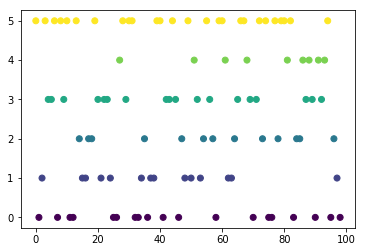

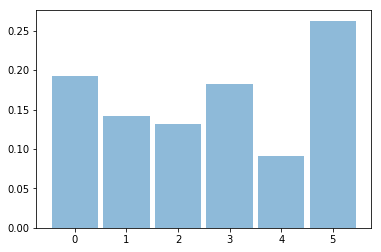

In [43]:
#Generando algunos gráficos de los resultados
labels = model.predict(X)
plt.scatter(range(99),labels,c=labels)
show()
hist(labels,bins=np.arange(-0.5,5.6,1),alpha=0.5,rwidth=0.9,density=True)
show()

<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<p>Pregunta Nº3:Explore diversos valores en los parámetros de n_init y max_iter. ¿tienen influencia en los resultados? ¿Por qué? Describa e interprete los resultados.</p></div>

<div style="border: 2px solid #1c75c8; background-color: #F8B4B4">
<p>En lo que sigue se construye un modelo probabilista de tópicos, considerando de 1 a 9 tópicos (para comparar con Kmeans
 y el algoritmo LDA estimado con el <a href="https://drive.google.com/open?id=1AoCcmg91Y1yRwM_Ox4Nvf6PGSQ9TybpE">, método de Bayes Variacional</a>, disponible como desarrollo en <a href="http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html">sklearn-lda.</a></p> 
Previo a ello se utiliza la clase CountVectorizer y su función fit_transform que permite construir una matriz tf (DTM, Document-Term Matrix) que contiene la frecuencia de aparición de cada término del vocabulario en cada texto analizado. En la definición de la clase se especifica que:
<ol>
    <li>los términos que  aparecen sólo una vez en algún texto no serán considerados en el vocabulario (min_df=2)</li>
    <li> los términos que  aparecen en mas del 95% de los textos no serán considerados en el vocabulario (max_df=0.95)</li>
    <li> se considera adicionalmente un conjunto de stop words construido ad-hoc, posible de refinar</li>
</ol></div>

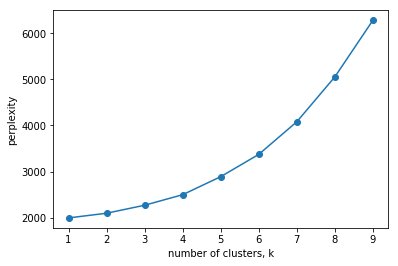

In [44]:
#Aplicando Modelos Probabilistas de Tópicos y LDA
from sklearn.decomposition import LatentDirichletAllocation

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
    
myStopWords=['a','e','o','u','y']
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                stop_words=myStopWords,tokenizer=spacy_tokenizer, ngram_range=(1,2))
tf = tf_vectorizer.fit_transform(noticias)
diccionario= tf_vectorizer.get_feature_names()


perp = []
for k in num_k:
    #Estimación de LDA con Bayes Variacional
    lda = LatentDirichletAllocation(n_components=k, max_iter=10,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

    lda.fit(tf)
    #Cálculo de índice de ajuste de los datos
    perp.append(lda.perplexity(tf))

plt.plot(num_k, perp, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('perplexity')
plt.xticks(num_k)
plt.show()

#print("\nTopics in LDA model:")
#print_top_words(lda, diccionario, 15)


<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<p>Pregunta Nº4: Indage sobre la medida perplexity, ¿Cómo se interpreta el valor obtenido?
</p></div>

[0.10381865 0.31337154 0.10731524 0.276455   0.19738916 0.00165042]
[0 1 2 3 4 5]


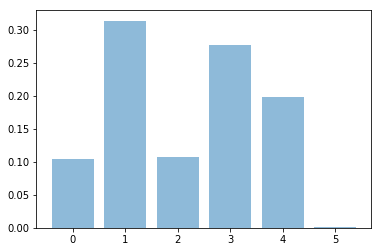

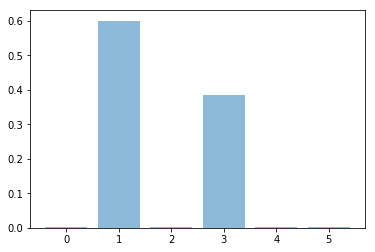

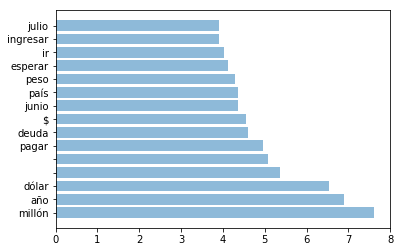

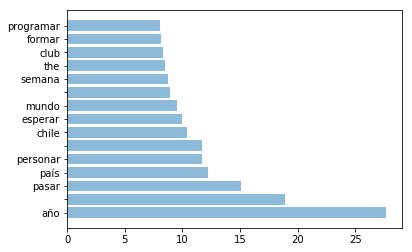

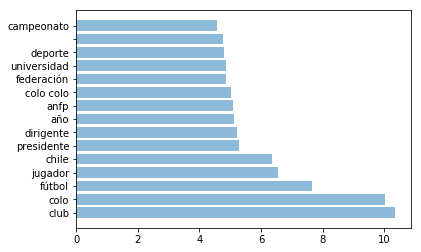

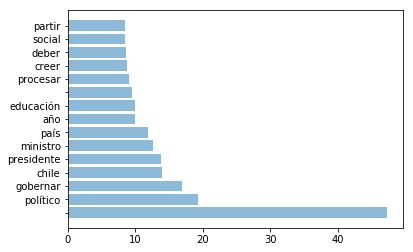

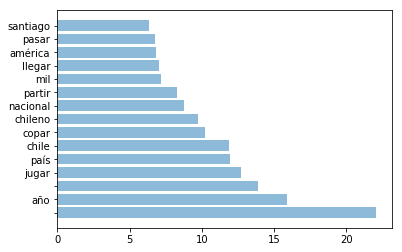

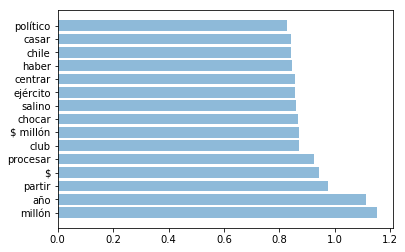

In [70]:
#Generando algunos gráficos de los resultados
from matplotlib.pylab import hist, show
import seaborn as sns

lda = LatentDirichletAllocation(n_components=true_k, max_iter=10,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
y=lda.fit_transform(tf)


#distribución de tópicos en todos los documentos
dist = sum(y)/len(noticias)
print(dist)

w=np.arange(0,true_k)
print(w)
plt.bar(w,height=dist,alpha=0.5,tick_label=w)
show()
#distribución de tópicos en el documento 100
plt.bar(w,height=y[98],alpha=0.5,tick_label=w)
show()


#frecuencia de palabras por tópico
n_top_words=15
numo =np.arange(0,n_top_words)
for idx,topic in enumerate(lda.components_):
    d =[]
    s = []
    for i in topic.argsort()[:-n_top_words - 1:-1]:
          s.append(diccionario[i])
          d.append(topic[i])
    
    plt.barh(numo,width=d,alpha=0.5,tick_label=s)
    show()


<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<p>Pregunta Nº5: Interprete estos gráficos. 
</p></div>

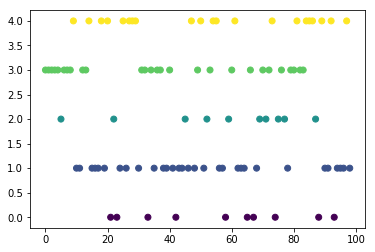

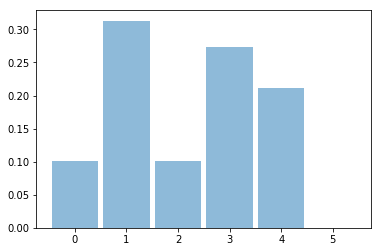

In [71]:
#calculando cluster en base al tópico mas frecuente
z=[]
for i in range(len(noticias)):
    z.append(np.argmax(y[i]))
plt.scatter(range(99),z,c=z)

#distribución de cluster de acuerdo al cálculo anterior
show()
hist(z,bins=np.arange(-0.5,5.6,1),alpha=0.5,rwidth=0.9,density=True)
show()


<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<p>Pregunta Nº6: ¿Cómo se comparan estos resultados con los de  Kmeans?
</p></div>


<div style="border: 2px solid #1c75c8; background-color: #F8B4B4">
<p>Una nueva estimación para algoritmo LDA considerando <a href="https://drive.google.com/open?id=1oSRRvG_W0UaH0l4o9f5ClEyWuGY1j-s0"> Gibbs Sampling</a>, disponible como desarrollo en <a href="https://github.com/lda-project/lda/">lda-project.</a></p> 
</div>

In [66]:
import lda

model = lda.LDA(n_topics=true_k, n_iter=5000, alpha=0.1, eta=0.1, random_state=3)
model.fit(tf)  # model.fit_transform(X) is also available

topic_word = model.topic_word_  # model.components_ also works
n_top_words=10
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(diccionario)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))
    


INFO:lda:n_documents: 99
INFO:lda:vocab_size: 2497
INFO:lda:n_words: 15052
INFO:lda:n_topics: 6
INFO:lda:n_iter: 5000
C:\ProgramData\Anaconda3\lib\site-packages\lda\utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):
INFO:lda:<0> log likelihood: -150424
INFO:lda:<10> log likelihood: -125515
INFO:lda:<20> log likelihood: -121893
INFO:lda:<30> log likelihood: -120654
INFO:lda:<40> log likelihood: -120178
INFO:lda:<50> log likelihood: -119774
INFO:lda:<60> log likelihood: -119406
INFO:lda:<70> log likelihood: -119191
INFO:lda:<80> log likelihood: -119152
INFO:lda:<90> log likelihood: -119151
INFO:lda:<100> log likelihood: -119128
INFO:lda:<110> log likelihood: -119530
INFO:lda:<120> log likelihood: -119279
INFO:lda:<130> log likelihood: -118871
INFO:lda:<140> log likelihood: -119085
INFO:lda:<150>

INFO:lda:<1980> log likelihood: -118817
INFO:lda:<1990> log likelihood: -118608
INFO:lda:<2000> log likelihood: -118598
INFO:lda:<2010> log likelihood: -118759
INFO:lda:<2020> log likelihood: -118579
INFO:lda:<2030> log likelihood: -118669
INFO:lda:<2040> log likelihood: -118665
INFO:lda:<2050> log likelihood: -118704
INFO:lda:<2060> log likelihood: -118578
INFO:lda:<2070> log likelihood: -118759
INFO:lda:<2080> log likelihood: -118696
INFO:lda:<2090> log likelihood: -118851
INFO:lda:<2100> log likelihood: -118708
INFO:lda:<2110> log likelihood: -118743
INFO:lda:<2120> log likelihood: -118675
INFO:lda:<2130> log likelihood: -118788
INFO:lda:<2140> log likelihood: -118523
INFO:lda:<2150> log likelihood: -118698
INFO:lda:<2160> log likelihood: -118689
INFO:lda:<2170> log likelihood: -118773
INFO:lda:<2180> log likelihood: -118707
INFO:lda:<2190> log likelihood: -118896
INFO:lda:<2200> log likelihood: -118856
INFO:lda:<2210> log likelihood: -118933
INFO:lda:<2220> log likelihood: -118454


INFO:lda:<4030> log likelihood: -118625
INFO:lda:<4040> log likelihood: -118392
INFO:lda:<4050> log likelihood: -118659
INFO:lda:<4060> log likelihood: -118651
INFO:lda:<4070> log likelihood: -118568
INFO:lda:<4080> log likelihood: -118588
INFO:lda:<4090> log likelihood: -118778
INFO:lda:<4100> log likelihood: -119086
INFO:lda:<4110> log likelihood: -118533
INFO:lda:<4120> log likelihood: -118512
INFO:lda:<4130> log likelihood: -118607
INFO:lda:<4140> log likelihood: -118618
INFO:lda:<4150> log likelihood: -118607
INFO:lda:<4160> log likelihood: -118713
INFO:lda:<4170> log likelihood: -118706
INFO:lda:<4180> log likelihood: -118815
INFO:lda:<4190> log likelihood: -119039
INFO:lda:<4200> log likelihood: -118551
INFO:lda:<4210> log likelihood: -118695
INFO:lda:<4220> log likelihood: -118578
INFO:lda:<4230> log likelihood: -118551
INFO:lda:<4240> log likelihood: -118857
INFO:lda:<4250> log likelihood: -118478
INFO:lda:<4260> log likelihood: -118742
INFO:lda:<4270> log likelihood: -118575


Topic 0: gobernar    educación nacional reformar ley presidente sistema gratuidad social
Topic 1: personar año país    pasar gente querer ir recibir encontrar
Topic 2: jugar jugador copar chile club partir fútbol colo mil sentir
Topic 3: millón pagar dólar club empresa $ operación región abogar año
Topic 4:    político chile presidente procesar deber partir    señalar casar
Topic 5: año       historia película julio the   estrenar canal


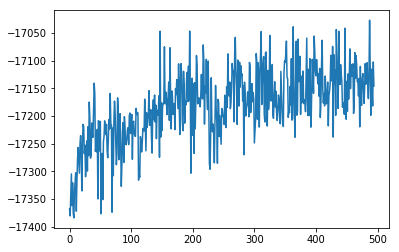

In [19]:
plt.plot(model.loglikelihoods_[5:])

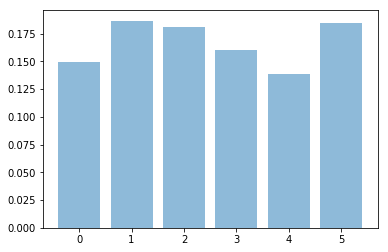

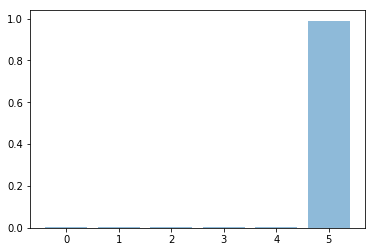

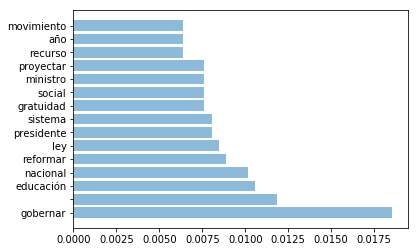

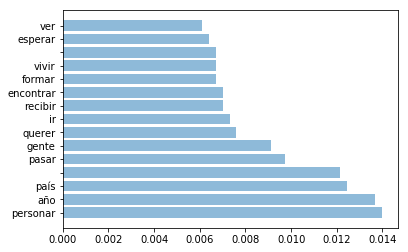

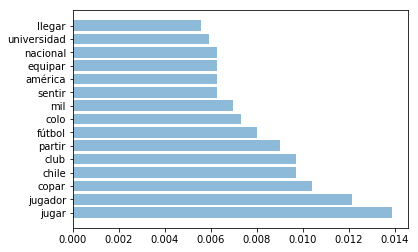

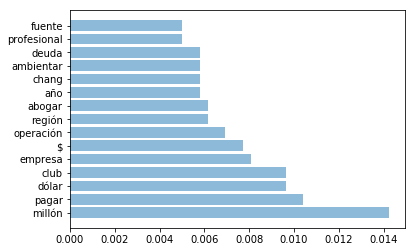

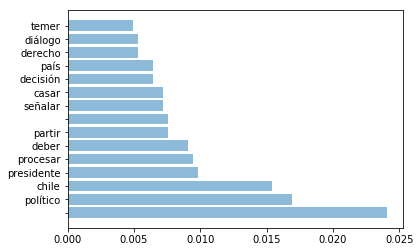

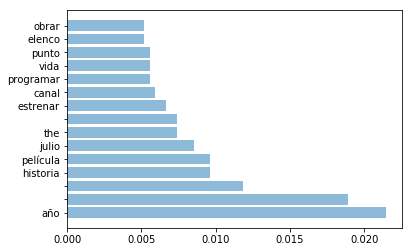

In [73]:
#Generando algunos gráficos de los resultados
from matplotlib.pylab import hist, show

y=model.doc_topic_
#distribución de tópicos en todos los documentos
dist = sum(y)/len(noticias)
w=np.arange(0,true_k)
plt.bar(w,height=dist,alpha=0.5,tick_label=w)
show()

#distribución de tópicos en el documento 100
plt.bar(w,height=y[98],alpha=0.5,tick_label=w)
show()

#frecuencia de palabras por tópico
n_top_words=15
numo =np.arange(0,n_top_words)

for idx,topic in enumerate(model.topic_word_):
    d =[]
    s = []
    for i in topic.argsort()[:-n_top_words - 1:-1]:
          s.append(diccionario[i])
          d.append(topic[i])
    
    plt.barh(numo,width=d,alpha=0.5,tick_label=s)
    show()





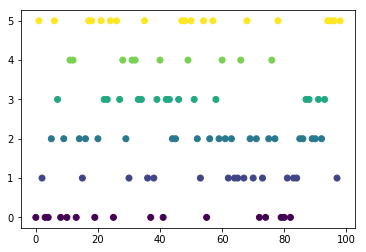

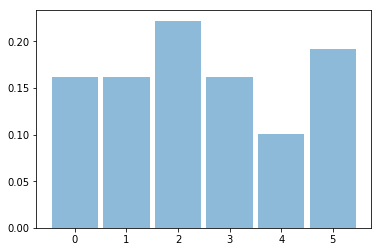

In [75]:
#calculando cluster en base al tópico mas frecuente
z=[]
for i in range(len(noticias)):
    z.append(np.argmax(y[i]))
plt.scatter(range(99),z,c=z)
show()

#distribución de cluster de acuerdo a la definición anterior
hist(z,bins=np.arange(-0.5,5.6,1),alpha=0.5,rwidth=0.9,density=True)
show()



<div style="border: 2px solid #1c75c8; background-color: #c5ddf6;">
<p>Pregunta Nº7: ¿Cómo se comparan estos resultados con los anteriores? ¿Qué puede decir de la convergencia de la estimación en este caso?
</p></div>

<div style="border: 2px solid #1c75c8; background-color: #F8B4B4">
<p>Considerando este ejemplo realice el análisis tópicos del set de datos de su elección disponible en <a href=  "https://drive.google.com/drive/folders/1rc_wTBvm2YLMPO4GK3mM2vjuEXlPN1JN?usp=sharing"> Carpeta en drive </a>
Comente sus hallazgos </p> </div>